We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [332]:
#!rm COVID-19-geographic-disbtribution-worldwide.xlsx
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-05-25 19:36:37--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 2600:9000:21c7:4000:1d:d83a:40c0:93a1, 2600:9000:21c7:d400:1d:d83a:40c0:93a1, 2600:9000:21c7:c600:1d:d83a:40c0:93a1, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|2600:9000:21c7:4000:1d:d83a:40c0:93a1|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ not modified on server. Omitting download.



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [333]:
import pandas as pd
import numpy  as np

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [334]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', keep_default_na=False, na_values='')
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-05-25,25,5,2020,584,2,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-05-24,24,5,2020,782,11,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-05-23,23,5,2020,540,12,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-05-22,22,5,2020,531,6,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-05-21,21,5,2020,492,9,Afghanistan,AF,AFG,37172386.0,Asia
5,2020-05-20,20,5,2020,581,5,Afghanistan,AF,AFG,37172386.0,Asia
6,2020-05-19,19,5,2020,408,4,Afghanistan,AF,AFG,37172386.0,Asia
7,2020-05-18,18,5,2020,262,1,Afghanistan,AF,AFG,37172386.0,Asia
8,2020-05-17,17,5,2020,0,0,Afghanistan,AF,AFG,37172386.0,Asia
9,2020-05-16,16,5,2020,1063,32,Afghanistan,AF,AFG,37172386.0,Asia


Last check of our source dataframe.

In [335]:
df.count()

dateRep                    19248
day                        19248
month                      19248
year                       19248
cases                      19248
deaths                     19248
countriesAndTerritories    19248
geoId                      19248
countryterritoryCode       19052
popData2018                18987
continentExp               19248
dtype: int64

We pivot to a country by column format.

In [336]:
df_geo = df.pivot(index='dateRep', columns='geoId', values=['cases', 'deaths'])
df_geo

cases                                                         ...  \
geoId         AD     AE     AF   AG   AI    AL     AM   AO     AR    AT  ...   
dateRep                                                                  ...   
2019-12-31   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-01   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-02   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-03   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-04   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
...          ...    ...    ...  ...  ...   ...    ...  ...    ...   ...  ...   
2020-05-21   1.0  941.0  492.0  0.0  0.0  15.0  230.0  2.0  474.0  18.0  ...   
2020-05-22   0.0  894.0  531.0  0.0  0.0   5.0  335.0  6.0  648.0  57.0  ...   
2020-05-23   0.0  994.0  540.0  0.0  0.0  12.0  322.0  2.0  718.0  29.0  ...   
2020-05-24   0.0  812.0  782.0  0.0  0.0   8.0  374.0  0.0  704.0  46.0  ...   
2020-05-25   1.0  781.0  584.0  0.0  0.0   9.0  359.0  9.0  723.0  32.0  ...   

           deaths                                                
geoId          VC   VE   VG   VI   VN   XK   YE    ZA   ZM   ZW  
dateRep                                                          
2019-12-31    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-01    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-02    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-03    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-04    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
...           ...  ...  ...  ...  ...  ...  ...   ...  ...  ...  
2020-05-21    0.0  0.0  0.0  0.0  0.0  0.0  1.0  27.0  0.0  0.0  
2020-05-22    0.0  0.0  0.0  0.0  0.0  0.0  4.0  30.0  0.0  0.0  
2020-05-23    0.0  0.0  0.0  0.0  0.0  0.0  0.0  28.0  0.0  0.0  
2020-05-24    0.0  0.0  0.0  0.0  0.0  0.0  6.0  10.0  0.0  0.0  
2020-05-25    0.0  0.0  0.0  0.0  0.0  0.0  3.0  22.0  0.0  0.0  

[147 rows x 420 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we use the current range and add six months and check our latest date.

In [337]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.min() + pd.Timedelta('365 days'))
df_geo = df_geo.reindex(new_index)
df_geo

cases                                          ... deaths          \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...     VC  VE  VG   
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
...          ...  ...  ...  ..  ..  ..  ...  ..  ..  ...  ...    ...  ..  ..   
2020-12-26   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2020-12-27   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2020-12-28   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2020-12-29   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2020-12-30   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   

                                         
geoId       VI   VN  XK  YE  ZA  ZM  ZW  
2019-12-31 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-01 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-02 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-03 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-04 NaN  0.0 NaN NaN NaN NaN NaN  
...         ..  ...  ..  ..  ..  ..  ..  
2020-12-26 NaN  NaN NaN NaN NaN NaN NaN  
2020-12-27 NaN  NaN NaN NaN NaN NaN NaN  
2020-12-28 NaN  NaN NaN NaN NaN NaN NaN  
2020-12-29 NaN  NaN NaN NaN NaN NaN NaN  
2020-12-30 NaN  NaN NaN NaN NaN NaN NaN  

[366 rows x 420 columns]

Most algorithms take numerical data as inputs for a model, so we add a column representing the date as days since January 1st, 2019. To access the date values in the index easily, we first create a separate column.

In [338]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    366.000000
mean     182.500000
std      105.799338
min        0.000000
25%       91.250000
50%      182.500000
75%      273.750000
max      365.000000
Name: daynum, dtype: float64

We create a simple dataframe to contain the source values for our fitting approach. The typical progress of an outbreak usually fits a Gumbel distribution, where the cumulative distribution is a double negative exponent: `exp(-exp(-x))`. Before fitting we have to find out how far a country has come along the curve. We use the residuals of a fit along the double logarithm, which should approach a straight line.

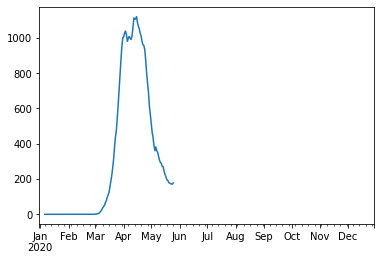

In [339]:
country  = 'NL'
measure  = 'cases'
pmeasure = 'pcases'
smeasure = 'scases'

df_geo[(smeasure, country)] = df_geo[measure][country].rolling(7).mean()

df_pred = pd.DataFrame({
    'daynum':df_geo['daynum'], measure:df_geo[smeasure][country]})
df_pred[measure].plot()

To ignore early outbreaks and long tails, we define the minimum case count as one in million and find the current total number of cases for scaling.

In [340]:
popdata = df[df['geoId'] == country]['popData2018'].iloc[0]
mincases = popdata / 1e6
numcases = df_pred[measure].sum()
print(mincases, numcases)

17.231017 44675.0


From our dataframe we select only the days with cases above the minimum and create a column with cumulative data for fitting the Gumbel distribution, which is cumulative.

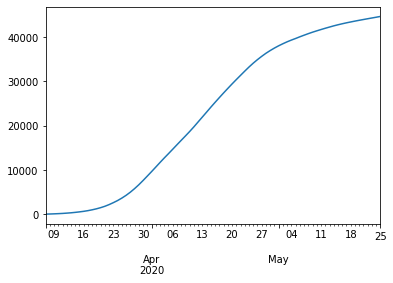

In [341]:
df_pred = df_pred[df_pred[measure] > mincases]
df_pred['cumul'] = df_pred[measure].cumsum()
df_pred['cumul'].plot()

For correct scaling of the data we need to find the current progress of the outbreak, in other words, what part of the distribution we wil try to fit. The function below takes a progress as input and determines the fit for that progress, returning the residuals as a measure of fit quality.

Preparing for the fit, we normalize our input and scale with the current number for progress. Preventing numerical errors we select cases below one, taking the double negative logarithm after we make sure the input is at least larger than 10 measures, to prevent spurious fits. (Such as fitting a line on just two measures, which would be perfect but not relevant.)

In [342]:
def fitres(progress):
    global df_pred, fit
    
    df_pred['scaled'] = df_pred['cumul'] / numcases * progress
    
    if len(df_pred) > 10:
        df_pred['linear'] = - np.log(- np.log(df_pred[df_pred['scaled'] < 1]['scaled']))
        fit = np.polyfit(x=df_pred['daynum'], y=df_pred['linear'], deg=1, full=True)
        print('Progress {:11.9f} gives {:12.9f} for {:1.0f} measures'.format(
            progress, fit[1][0], len(df_pred[df_pred['scaled'] < 1])))
        return(fit[1][0] / fit[0][0])
    else:
        return np.nan

An optimizer can call the function repeatedly to find the input that returns the best output. In this case `minimize` will find the progress that returns the lowest residuals, indicating the best fit. We use a least squares method that searches from 1 to any number between 0.1 and 1. If a country is at less than 10% of progress the numbers will not likely produce a relevant curve.

In [343]:
from scipy.optimize import minimize_scalar

optim = minimize_scalar(fitres, method='bounded', bounds=(0, 2.5))

Progress 0.954915028 gives  0.133904303 for 80 measures
Progress 1.545084972 gives          nan for 44 measures
Progress 0.590169944 gives  2.970992279 for 80 measures
Progress 1.180339887 gives          nan for 55 measures
Progress 0.815594803 gives  1.898620546 for 80 measures
Progress 1.041019662 gives          nan for 70 measures
Progress 0.901699437 gives  0.771993756 for 80 measures
Progress 0.987804072 gives  2.358035011 for 80 measures
Progress 0.934588481 gives  0.279744568 for 80 measures
Progress 0.967477525 gives  0.292100166 for 80 measures
Progress 0.947150978 gives  0.155732832 for 80 measures
Progress 0.959713475 gives  0.157059085 for 80 measures
Progress 0.951949425 gives  0.135112972 for 80 measures
Progress 0.956747872 gives  0.138655413 for 80 measures
Progress 0.953782268 gives  0.133157937 for 80 measures
Progress 0.953082185 gives  0.133463006 for 80 measures
Progress 0.954214944 gives  0.133257247 for 80 measures
Progress 0.954156072 gives  0.133230479 for 80 m

The optimization gives detailed results, such as the best result in `fun`, the number of iterations in `nfev` and the optimal input in `x[0]`. That number is the actual progress, e.g. a result of `0.77` would mean that we estimate the outbreak at 77% of total cases.

In [344]:
progress = optim.x
print(optim)

     fun: 2.0607271407031056
 message: 'Solution found.'
    nfev: 20
  status: 0
 success: True
       x: 0.9541594194244251


The `scaled` column contains the scaled cumulative distribution that should look like a gumbel cumulative distribution.

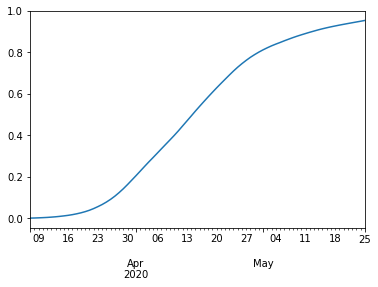

In [345]:
df_pred['scaled'].plot()

The `linear` column contains the line that we try to fit. We can check the fit with `polyval`, applying the linear factors to the input column with day numbers and plotting both `linear` and `fitted` for a visual check.

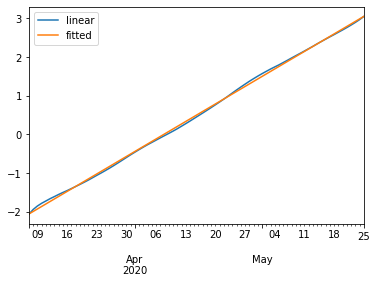

In [346]:
df_pred['fitted'] = np.polyval(fit[0], df_pred['daynum'])
df_pred[['linear', 'fitted']].plot()

From slope and intercept of this line we can calculate beta and mu of the Gumbel distribution.

In [347]:
slope = fit[0][0]
intercept = fit[0][1]
print('Slope {:1.6f} with intercept at {:1.3f}'.format(slope, intercept))
beta = 1 / slope
mu = - intercept * beta
print('Gumbel beta {:1.3f} with mu at {:1.0f}'.format(beta, mu))

Slope 0.064654 with intercept at -6.390
Gumbel beta 15.467 with mu at 99


Finished fitting, now back to the original data! Once we have the fitted values, we take the double negative exponential to find the estimated cumulative curve. To reduce that to the orignal curve we take the difference between subsequent values with `shift`.

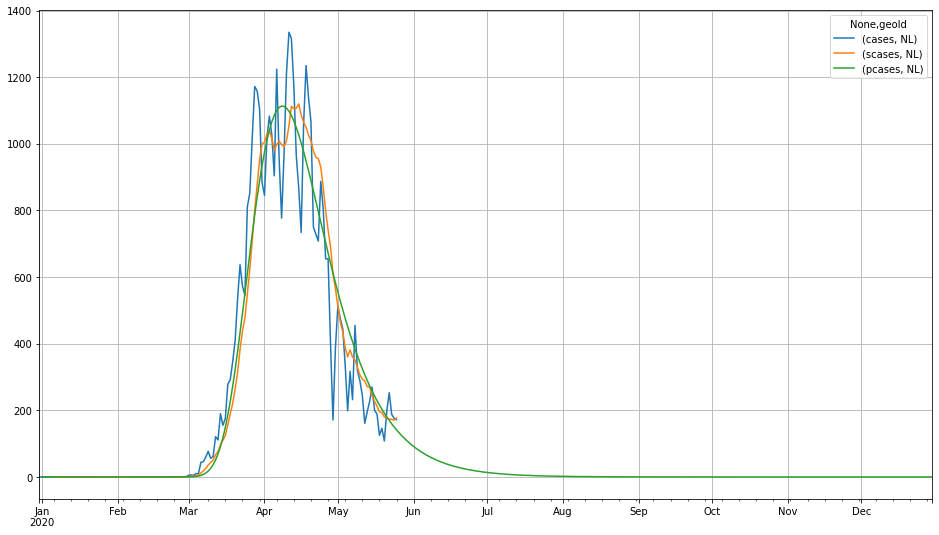

In [348]:
df_geo[(pmeasure, country)] = np.exp(- np.exp(- np.polyval(fit[0], df_geo['daynum']))) * numcases / progress
df_geo[(pmeasure, country)] = df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()
df_geo[[(measure, country), (smeasure, country), (pmeasure, country)]].plot(
    figsize=(16, 9), grid=True)

Now that we have a curve fitted, we can see where the cumulative number will end up if none of our assumptions change (which is rarely the case).

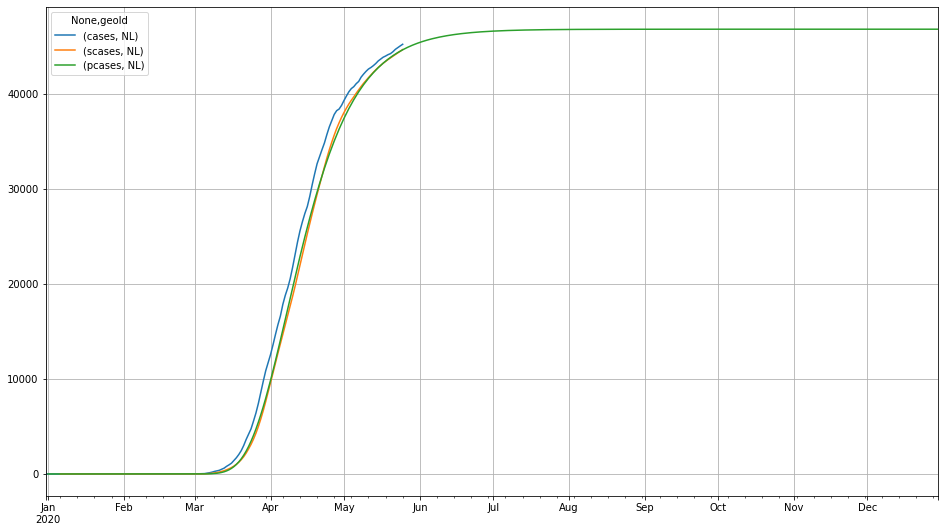

In [349]:
df_geo[[(measure, country), (smeasure, country), (pmeasure, country)]].cumsum().plot(
    figsize=(16, 9), grid=True)

The end value of the cumulative data would be the estimated total number.

In [350]:
final = df_geo[pmeasure][country].cumsum().max()
print('Final of {:1.0f}'.format(final))

Final of 46821


The peak can be found at the first predicted value that is larger than the next.

In [351]:
peak = df_geo[(df_geo[(pmeasure, country)] > df_geo[(pmeasure, country)].shift(-1))].index.min()
print('Peak at {}'.format(peak.date()))

Peak at 2020-04-08


The floor is defined as the first time that the number of reported cases falls below 2 in a million, which is the first time that happens *after* the peak.

In [352]:
floor = df_geo[(df_geo[(pmeasure, country)] < (popdata / 1e6)) & (
    df_geo[(pmeasure, country)].index > peak)].index.min()
print('Floor at {}'.format(floor.date()))

Floor at 2020-06-28


Similarly, we can calculate the start as the first day where the number of cases was above 2 in a million before the peak.

In [353]:
start = df_geo[(df_geo[(pmeasure, country)] > (popdata / 1e6)) & (
    df_geo[(pmeasure, country)].index < peak)].index.min()
print('Start at {}'.format(start.date()))

Start at 2020-03-09


We define the maximum delta as the day in the curve with the sharpest rise.

In [354]:
maxrise = (df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()).max()
maxdelta = df_geo[(df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()) == (
    maxrise)].index.min()
print('Largest rise of {:1.0f} on {}'.format(maxrise, maxdelta.date()))

Largest rise of 60 on 2020-03-25


If we look at the difference between our actual (smoothed) value and our prediction, we can clearly see if the curve is breaking out after the floor. This can be the result of relaxing of measures and the beginning of a second wave, an increase in testing or other factors.

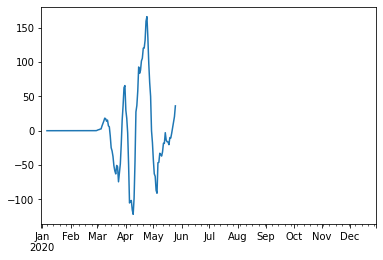

In [355]:
(df_geo[(smeasure, country)] - df_geo[(pmeasure, country)]).plot()

Keep exploring! Stay home, wash your hands, keep your distance.